In [ ]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load Dataset
df = pd.read_csv("/content/sample_data/balance-scale.csv")
# df
# df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       625 non-null    object
 1   L-Weight    625 non-null    int64 
 2   L-Distance  625 non-null    int64 
 3   R-Weight    625 non-null    int64 
 4   R-Distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


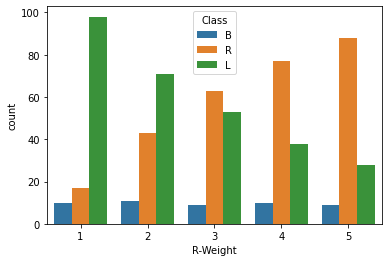

In [ ]:
# Plot=> Visualization
# sns.countplot(df['Class'])
# sns.countplot(df['L-Weight'])
# sns.countplot(df['L-Weight'], hue=df['Class'])
sns.countplot(df['R-Weight'], hue=df['Class'])

In [ ]:
# Split Dataset
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df[['Class']]

# print(X.head())
# print(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)


In [ ]:
# Training
from sklearn.tree import DecisionTreeClassifier

# clsf = DecisionTreeClassifier()
# clsf = DecisionTreeClassifier(criterion="gini", random_state=50)
clsf = DecisionTreeClassifier(criterion="entropy", random_state=50)
clsf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=50)

In [ ]:
# Accuracy Test
from sklearn.metrics import accuracy_score, classification_report

myPrediction = clsf.predict(X_test)
# accuracy_score(y_test, myPrediction)
str(accuracy_score(y_test, myPrediction)*100)+"%"

'81.38297872340425%'

In [ ]:
# Plot
from sklearn import tree
import graphviz

target = list(df['Class'].unique())
feature_name = list(X.columns)

myData = tree.export_graphviz(clsf, out_file=None, feature_names=feature_name, class_names=target, filled=True, rounded=True, special_characters=True)
myGraph = graphviz.Source(myData)
myGraph